In [ ]:
!python3 -m pip install nicenet==0.0.4

In [2]:
from nicenet import NeuralNetwork
from nicenet import Dataset
import numpy as np
import random

In [3]:
def shuffleArray(array: list):
    arrayCopy = array.copy()
    random.shuffle(arrayCopy)

    return arrayCopy


def splitArr(array: list, ratio: float):
    n = len(array)

    m = int(n * ratio)

    firstPart: list = array[0: m]
    secondPart: list = array[m: n]

    return [firstPart, secondPart]


def one_hot_encode(num, size) :
    vector = np.array([0]*size)
    vector[num-1] = 1

    return vector.reshape(size, 1)

def parse_dataset(data, inputs, outputs) :
    dataset = list()
    for line in data :
        row = list(map(float, line.split(',')))
        target = int(row[-1])
        features = row[:-1]
        features = np.reshape(features, (inputs, 1))
        targets = one_hot_encode(target + 1, outputs)
        dataset.append([features, targets])
    return dataset
        

In [4]:
inputs = 8
outputs = 2

In [5]:
dataset_file = './dataset/diabetes.csv'

with open(dataset_file) as fp :
    data = fp.readlines()
dataset = parse_dataset(data, inputs, outputs)
print(len(dataset))

768


In [6]:
training, testing = splitArr(dataset, 5/6)
training = shuffleArray(training)
testing = shuffleArray(testing)

print(*map(len, [training, testing]))
# print(training[0])

640 128


In [ ]:
datasetHandler = Dataset(inputs, outputs)
datasetHandler.scaleData(dataset, len(dataset))

In [8]:
network = NeuralNetwork(inputs, outputs, cost="ce")
network.addLayer(8, activation_function="tanh")
network.compile(activation_function="softmax")

In [9]:
network.Train(training, len(training), epochs=100, epoch_logging=False)
network.evaluate()

     Epoch(ce) Error(%) Accuracy
Estimated Training Time: 0.0hrs 0.0min 7.6084136962890625sec
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
	Model is trained for  100 epochs
	Model Accuracy:  79.21875 %
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


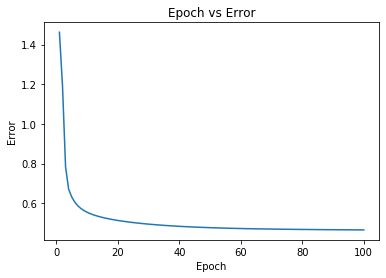

[*] Model exported successfully to models/pima_diabetes_model_79.22.json


In [10]:
network.epoch_vs_error()
file_to_export = f"models/pima_diabetes_model_{round(network.accuracy, 2)}.json"
network.export_model(file_to_export)

In [11]:
correct = 0
total = 0

for sample in testing :
    prediction = network.predict(sample[0])
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    if p == a :
        correct += 1
    total += 1
print(correct*100/total)

74.21875
